<a href="https://colab.research.google.com/github/Aehteshaam-Shaikh/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import  XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [3]:
#loading dataset
df = pd.read_excel('/content/drive/MyDrive/Credit Card Default Prediction/credit card clients.xls', header = 1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#check datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

* The dataset consist of 30000 rows and 25 columns having datatype as int

In [6]:
#statistical representation of data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#checking for duplicate values
df.duplicated().sum()


0

* No duplicate values are present in the dataset

In [8]:
#checking null values for each column
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

* No null values are present in the dataset

# Exploratory Data Analysis

###Dependent Variable 

In [9]:
# renaming 
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)

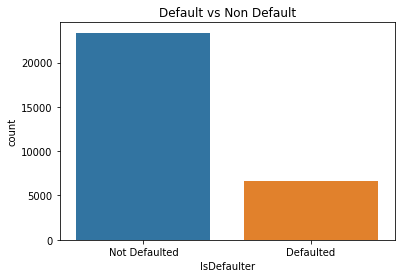

In [10]:
#Plotting dependent variable
ax = sns.countplot(x='IsDefaulter',data=df)
plt.title("Default vs Non Default")
ax.set_xticklabels(('Not Defaulted','Defaulted'))
plt.show()

* We can see that the dataset is imbalanced

## Independent Variables

### Categorical Features

In [11]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

* 11888 Male and 18112 Female credit card holders are present

In [12]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [13]:
#Aggregating values 4,5 and 6 to 0 as there are not much records in them
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [14]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [15]:
# There are not much records in 3 and 0 values, aggregating them
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [16]:
#Creating new Dataframe for categorical variables
df_cat = df[['SEX', 'EDUCATION', 'MARRIAGE']].copy()
df_cat['Defaulter'] = df['IsDefaulter']

#replace all values in categorical varibles with original names
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

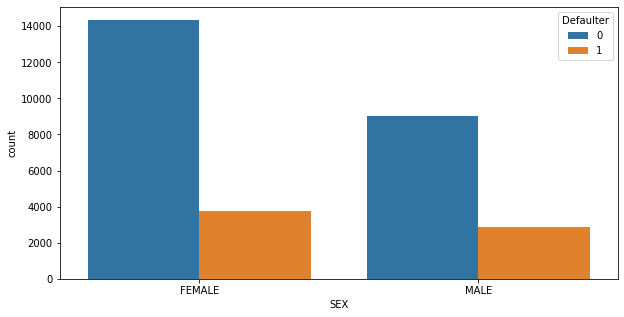

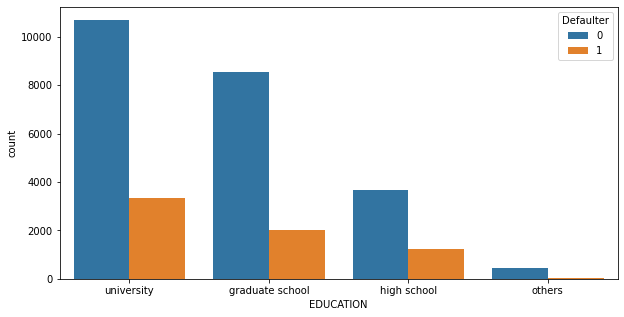

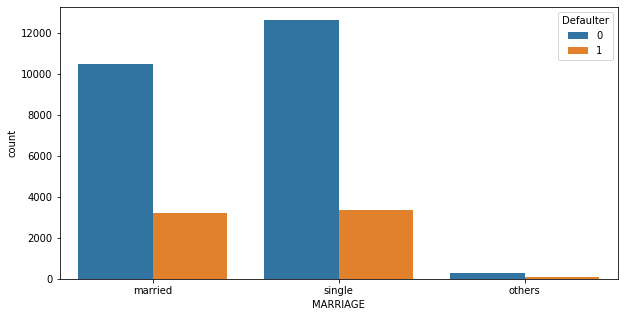

In [17]:
# printing the categorical feature value counts
for col in ['SEX', 'EDUCATION', 'MARRIAGE']:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

* There are more Female defaulters than men, since more female credit card holders are there.

* No of defaulters increases as their education level increases

* Both married as well as single have almost same no of defaulters

Text(0.5, 1.0, 'Credit limit & default next month')

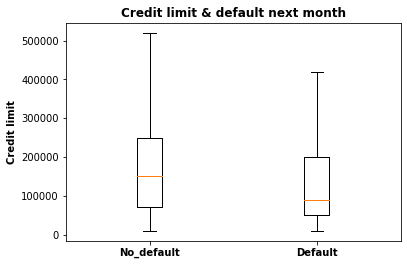

In [18]:
#separting people who has defaulted and Not defaulted
defaulted = df.loc[df['IsDefaulter'] == 0,'LIMIT_BAL']
not_defaulted = df.loc[df['IsDefaulter'] == 1,'LIMIT_BAL']

#Plotting data using Boxplot
fig, ax = plt.subplots()
ax.boxplot([defaulted, not_defaulted], showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

* The customers with high credit limit tend to have less default rate.

In [19]:
#renaming columns 
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [20]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


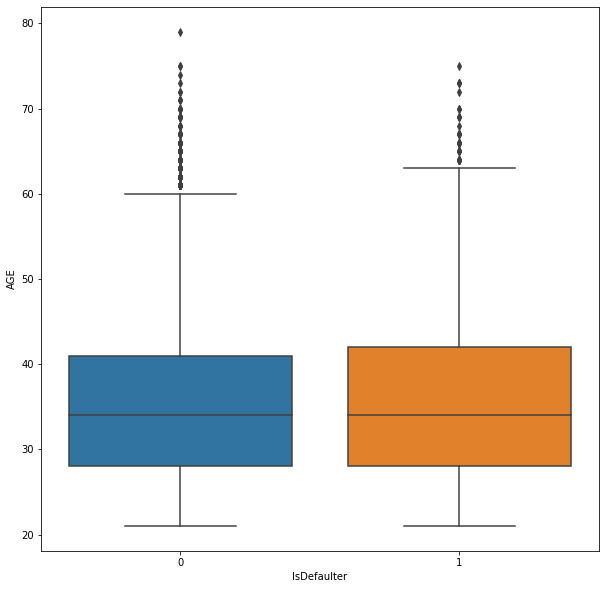

In [21]:
# Let's explore Age column
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df )

In [22]:
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

* Mean age of the customers for both the cases is around 35.

**Payment status history**

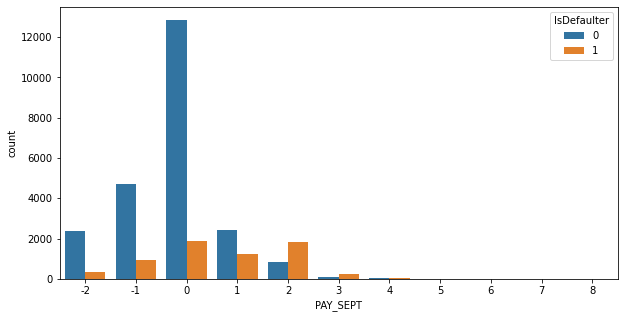

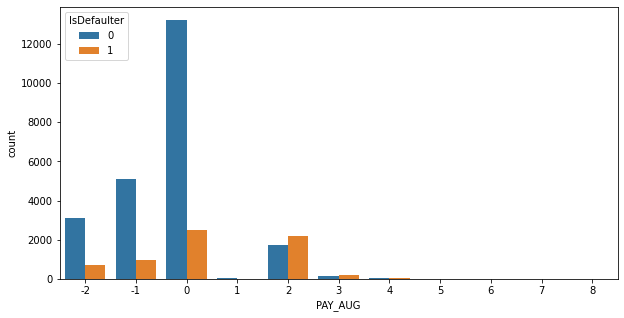

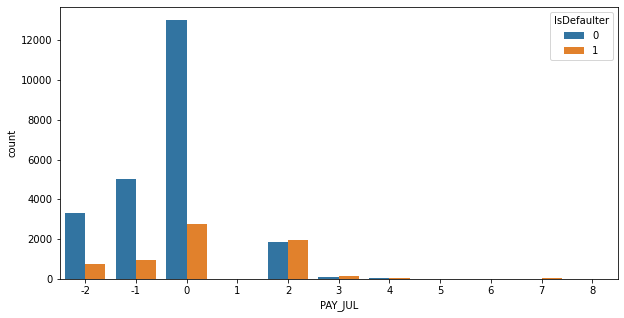

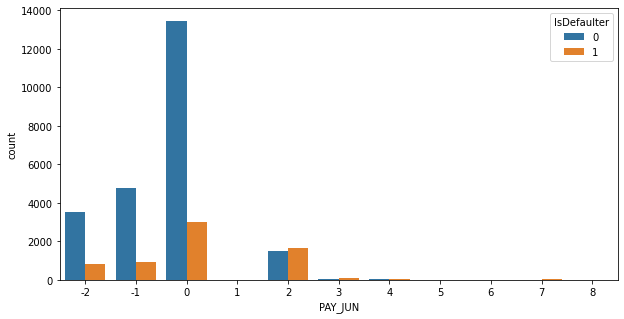

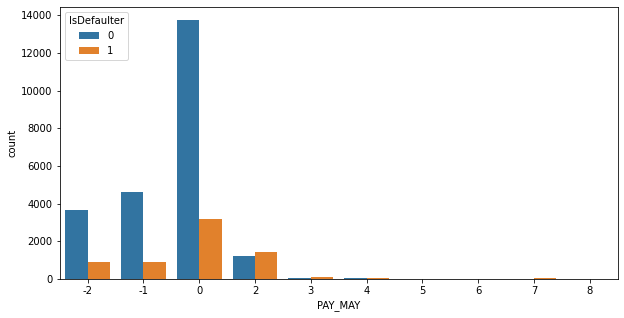

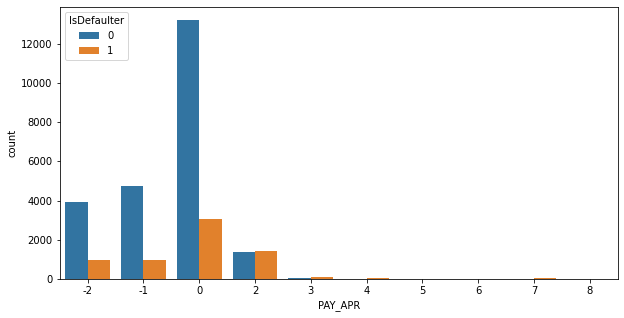

In [23]:
#Plotting payment staus using countplot
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']

for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

**Paid amount overview**

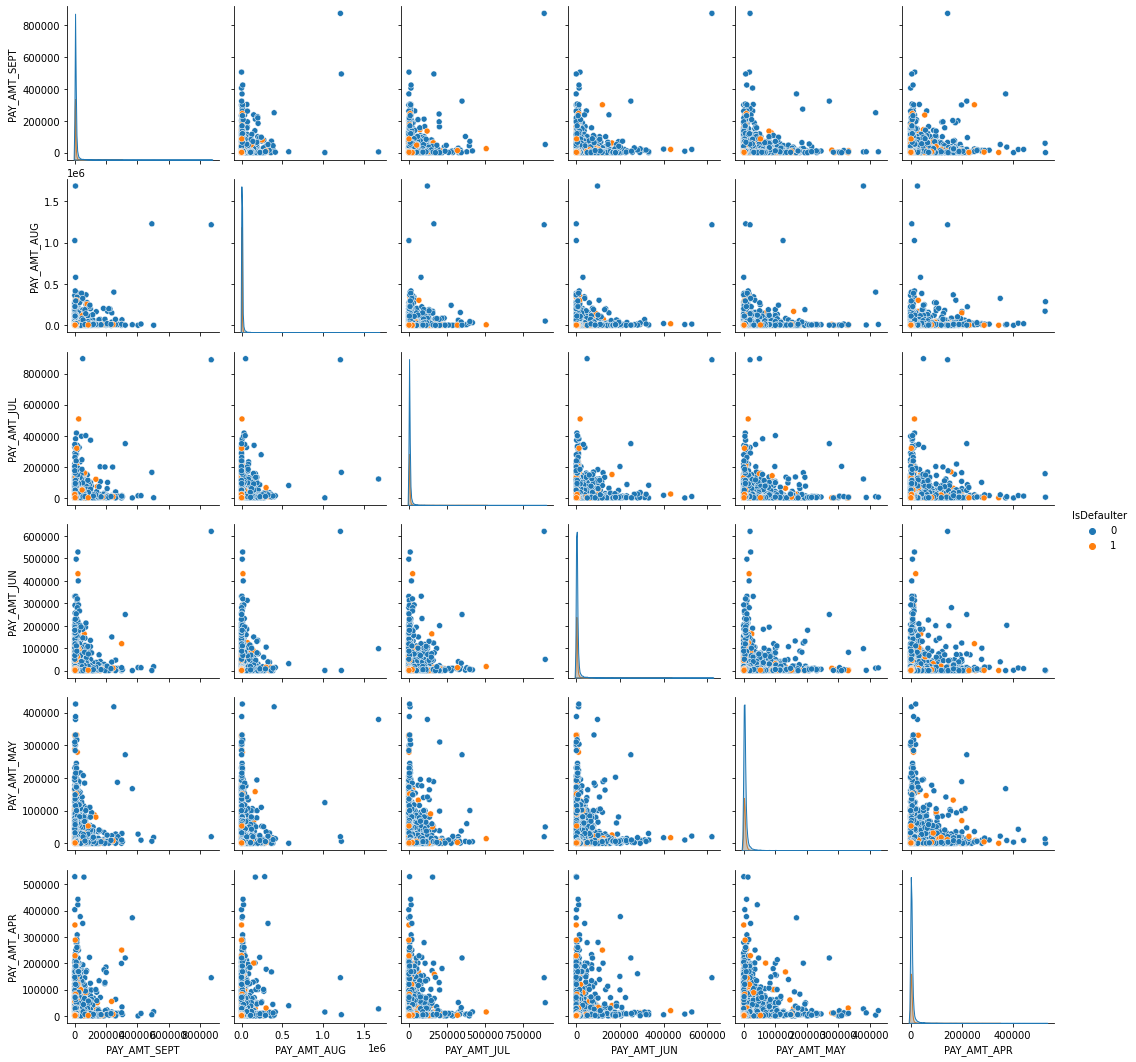

In [24]:
#Plotting paid amount using pairplot
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter']]
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

#As the dataset is imbalanced, applying SMOTE technique to deal with imbalanced dataset.

In [25]:
#Appplying smote technique
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [26]:
columns = list(df.columns)
columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_SEPT',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR',
 'BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR',
 'IsDefaulter']

In [27]:
#Remove the last column
columns.pop()

'IsDefaulter'

In [28]:
#Create a new Dataframe with balanced data
balanced_df = pd.DataFrame(x_smote, columns=columns)

In [29]:
balanced_df['IsDefaulter'] = y_smote

In [30]:
#check shape of new daatframe
balanced_df.shape

(46728, 25)

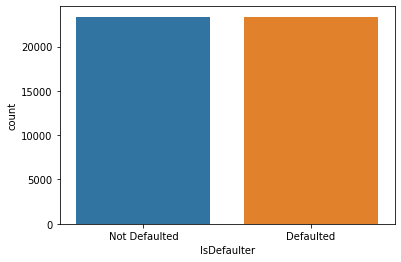

In [31]:
#plotting balanced data using countplot
ax = sns.countplot('IsDefaulter', data = balanced_df)
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()

* Now the dataset is balanced

In [32]:
#creating new column 'Payment value'
balanced_df['Payement_Value'] = balanced_df['PAY_SEPT'] + balanced_df['PAY_AUG'] + balanced_df['PAY_JUL'] + balanced_df['PAY_JUN'] + balanced_df['PAY_MAY'] + balanced_df['PAY_APR']

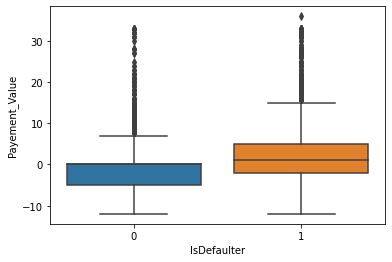

In [33]:
#Plot new feature using boxplot
sns.boxplot(data = balanced_df, x = 'IsDefaulter', y = 'Payement_Value' )

In [34]:
#create new feature dues
balanced_df['Dues'] = (balanced_df['BILL_AMT_APR']+balanced_df['BILL_AMT_MAY']+balanced_df['BILL_AMT_JUN']+balanced_df['BILL_AMT_JUL']
                       +balanced_df['BILL_AMT_SEPT'])-(balanced_df['PAY_AMT_APR']+balanced_df['PAY_AMT_MAY']+balanced_df['PAY_AMT_JUN']+
                                                       balanced_df['PAY_AMT_JUL']+balanced_df['PAY_AMT_AUG']+balanced_df['PAY_AMT_SEPT'])

In [35]:
balanced_df.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    193334.826956
Name: Dues, dtype: float64

In [36]:
#renaming column names
balanced_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
               'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [37]:
balanced_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620


###Label encoding

In [38]:
#Label encoding 'Sex' column
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
balanced_df = balanced_df.replace(encoders_nums)

###One hot encoding

In [39]:
# Performing One Hot encoding on Education and marriage columns
balanced_df = pd.get_dummies(balanced_df,columns=['EDUCATION','MARRIAGE'])

In [40]:
balanced_df

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,IsDefaulter,Payement_Value,Dues,EDUCATION_0,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,0,24,2,2,-1,-1,-2,-2,...,1,-2,3913,0,0,0,1,1,0,0
1,2,120000,0,26,-1,2,0,0,0,2,...,1,3,10352,0,0,0,1,0,0,1
2,3,90000,0,34,0,0,0,0,0,0,...,0,0,76608,0,0,0,1,0,0,1
3,4,50000,0,37,0,0,0,0,0,0,...,0,0,174713,0,0,0,1,1,0,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,0,-2,44620,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,2962,30000,1,36,2,2,2,2,0,0,...,1,8,149363,0,0,0,1,1,0,0
46724,25826,300000,1,32,2,1,0,0,0,0,...,1,3,1273075,0,1,0,0,1,0,0
46725,21940,90000,0,43,0,0,0,0,0,0,...,1,0,333452,0,0,0,1,1,0,0
46726,22238,255227,1,39,0,0,0,0,0,0,...,1,0,600697,0,1,0,0,1,0,0


In [41]:
balanced_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL',
       'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter', 'Payement_Value', 'Dues',
       'EDUCATION_0', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_others',
       'MARRIAGE_single'],
      dtype='object')

In [42]:
# dropping less important columns
balanced_df.drop(['EDUCATION_0','MARRIAGE_others'],axis = 1, inplace = True)

In [43]:
balanced_df.drop(['ID'],axis = 1, inplace = True)

In [44]:
balanced_df = pd.get_dummies(balanced_df, columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',	'PAY_MAY', 'PAY_APR'], drop_first = True )

In [45]:
balanced_df

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,30000,1,36,32003,32546,32422,30541,29560,30026,1340,...,0,1,0,0,0,0,0,0,0,0
46724,300000,1,32,270509,266781,271524,275677,255834,252800,3278,...,0,1,0,0,0,0,0,0,0,0
46725,90000,0,43,88093,88726,88468,74242,49858,49654,4573,...,0,1,0,0,0,0,0,0,0,0
46726,255227,1,39,171912,166341,169056,164001,111252,56987,5454,...,0,1,0,0,0,0,0,0,0,0


##Rescaling and Train Test Split

In [46]:
#Independent variables 
X = balanced_df.drop(columns=['IsDefaulter','Payement_Value','Dues'],axis=1)
#dependent variable
y = balanced_df['IsDefaulter']

In [47]:
cols = X.columns

In [48]:
#Rescaling independent features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)

#Logistic Regression

In [50]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_lr_clf = RandomizedSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy', verbose=3)

In [51]:
#get best parameters
grid_lr_clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [52]:
optimized_val = grid_lr_clf.best_estimator_

In [53]:
#get best score
grid_lr_clf.best_score_

0.7519642911736831

In [54]:
# Predicted Probability
train_preds = optimized_val.predict_proba(X_train)[:,1]
test_preds = optimized_val.predict_proba(X_test)[:,1]

In [55]:
# Get the predicted classes
train_class_preds = optimized_val.predict(X_train)
test_class_preds = optimized_val.predict(X_test)

In [56]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)
#get scores of various metrics
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on train data is  0.7530037604329084
The accuracy on test data is  0.7523361152721307
The precision on test data is  0.6891139962904836
The recall on test data is  0.788829005389515
The f1 on test data is  0.7356076759061834
The roc_score on test data is  0.7564332463624373


[[5717 1293]
 [2179 4830]]


[Text(0.5, 0, 'Not Defaulter'), Text(1.5, 0, 'Defaulter')]

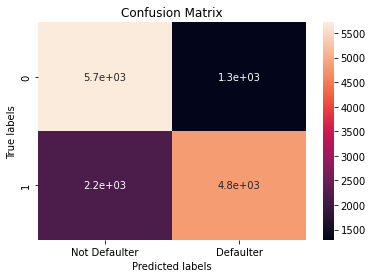

In [57]:
# Getting the confusion matrix 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

In [58]:
feature_importance = pd.DataFrame({'Features':cols, 'Importance':np.abs(optimized_val.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

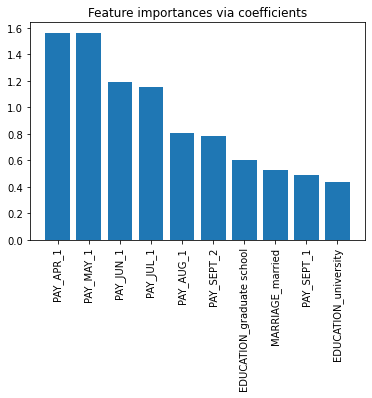

In [59]:
#plotting feature importance
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()

#Random Forest Classifier

In [60]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
#Fitting the model
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
# Getting the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [62]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)
# Get scores of various metrics
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on train data is  0.9994191201198447
The accuracy on test data is  0.8407161709109067
The precision on test data is  0.8109573405621344
The recall on test data is  0.8622572815533981
The f1 on test data is  0.8358208955223881
The roc_score on test data is  0.8419270789078421


In [63]:
# Creating parameter grid  
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [100, 150, 200]
}

In [64]:
# Instantiate grid search model
random_search = RandomizedSearchCV(estimator = rf_clf,param_distributions= param_grid,  scoring = 'accuracy',  
                                   cv = 3, n_jobs = -1, verbose = 1)

In [65]:
# Fit grid search to the data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 8, 10],
                                        'n_estimators': [100, 150, 200]},
                   scoring='accuracy', verbose=1)

In [66]:
#get best parameters
random_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 150}

In [67]:
#get best score
random_search.best_score_

0.8059249747775842

In [68]:
#get best estimator which can be used for prediction
optimal_rf_clf = random_search.best_estimator_

In [69]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [70]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

# Get scores of various metrics
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on train data is  0.9315478920174876
The accuracy on test data is  0.8226692346101719
The precision on test data is  0.7817092309887288
The recall on test data is  0.8514374514374514
The f1 on test data is  0.8150847961916097
The roc_score on test data is  0.8248484725541687


[[6054  956]
 [1530 5479]]


[Text(0.5, 0, 'Not Defaulter'), Text(1.5, 0, 'Defaulter')]

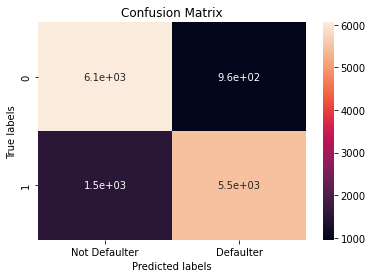

In [71]:
#Plotting Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

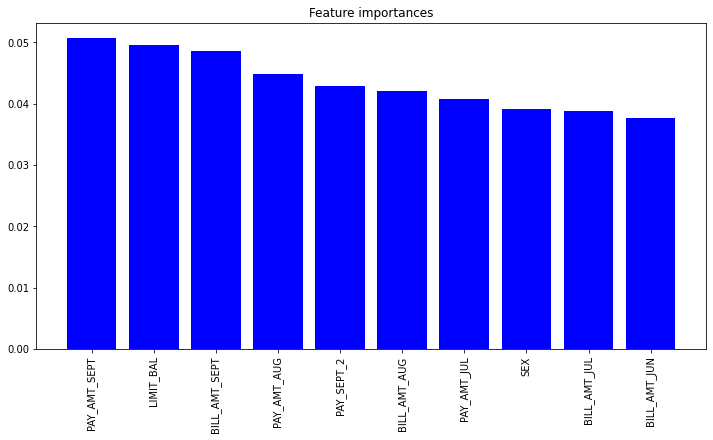

In [72]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = cols,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(12,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="blue",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 90)
plt.show()

#SVC

In [73]:
# creating parameters
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']}

In [74]:
#Instatntiate Randomized Search CV
grid_svc = RandomizedSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
# Fit the model
grid_svc.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


RandomizedSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['rbf']},
                   scoring='accuracy', verbose=3)

In [75]:
#getting best estimator
optimal_SVC_clf = grid_svc.best_estimator_

In [76]:
#getting best parameters
grid_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [77]:
#Get best score
grid_svc.best_score_

0.7730288299856308

In [78]:
# Getting the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [79]:
# Getting the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_SVC)
print("The accuracy on test data is ", test_accuracy_SVC)

The accuracy on train data is  0.8083402121740194
The accuracy on test data is  0.7807261573578714


In [80]:
#get scores on various metrics
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The precision on test data is  0.7199315166214867
The recall on test data is  0.8195549780737372
The f1 on test data is  0.7665198237885462
The roc_score on test data is  0.7849364816596109


[[5899 1111]
 [1963 5046]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

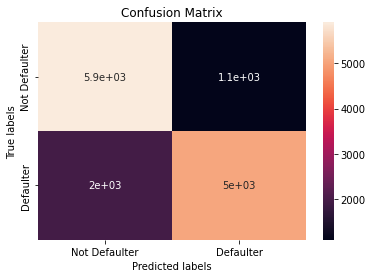

In [81]:
# Getting the confusion matrix for test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#XGBoost Classifier

In [82]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [83]:
xgb = XGBClassifier()

In [84]:
# Fitting the data
xgb = XGBClassifier(random_state=123,max_depth=8)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=8, random_state=123)

In [85]:
#Print model report:
y_pred_xgb = xgb.predict(X_test)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
print("Precision: {:.2f}%".format(xgb_precision))
print("Recall: {:.2f}%".format(xgb_recall))


pred_train_xgb = xgb.predict(X_train)
train_acc_xgb = accuracy_score(y_train, pred_train_xgb)
print("Train Accuracy: {:.2f}%".format(train_acc_xgb * 100))
    
pred_test_xgb = xgb.predict(X_test)
test_acc_xgb = accuracy_score(y_test, pred_test_xgb)
print("Test Accuracy: {:.2f}%".format(test_acc_xgb * 100))


train_pred_proba = xgb.predict_proba(X_train)[:,1]
xgb_auc_train = roc_auc_score(y_train, train_pred_proba)
print("Train AUC:" , xgb_auc_train )

test_pred_proba = xgb.predict_proba(X_test)[:,1]
xgb_auc_test = roc_auc_score(y_test, test_pred_proba)
print("Test AUC:" , xgb_auc_test )

Precision: 0.85%
Recall: 0.76%
Train Accuracy: 85.38%
Test Accuracy: 81.61%
Train AUC: 0.9355541807787029
Test AUC: 0.8948090787695218


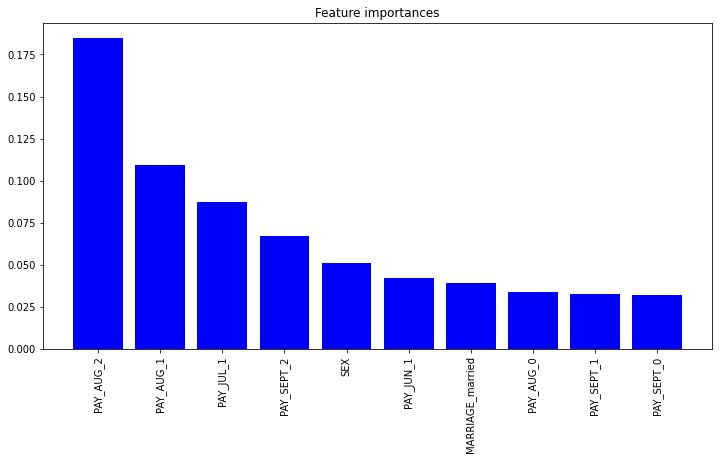

In [86]:
# Getting the Feature importance 
# Feature Importance
feature_importances_xgb = pd.DataFrame(xgb.feature_importances_,
                                   index = cols,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(12,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="blue",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 90)
plt.show()

In [89]:
Results = pd.DataFrame()
Results['Model Name'] = ['Logistic Regression', 'SVC', 'Random Forest Classifier', 'Xgboost Classifier']
Results['Precision'] = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, xgb_precision]
Results['Recall'] = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, xgb_recall]
Results['Train Accuracy'] = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_acc_xgb]
Results['Test Accuracy'] = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_acc_xgb]
Results['Test ROC-AUC'] = [test_roc_score_lr,test_roc_score_SVC, test_roc_score_rf, xgb_auc_test]
Results

,Model Name,Precision,Recall,Train Accuracy,Test Accuracy,Test ROC-AUC
0,Logistic Regression,0.689114,0.788829,0.753004,0.752336,0.756433
1,SVC,0.719932,0.819555,0.808340,0.780726,0.784936
2,Random Forest Classifier,0.781709,0.851437,0.931548,0.822669,0.824848
3,Xgboost Classifier,0.853631,0.763019,0.853802,0.816107,0.894809


* Some important inferences have been made from the EDA and have been incurred below every visualization.

* After training the models and comparing the results, it can be said that the XGBoost Classifier model has performed better than the other models.

* Pay amount for various months, Gender of customer and Maritial status came out as the most important features for the model.